In [30]:
# Extract and Read the data

import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

#file_path = "/home/amine/Desktop/Projects/Natural_Language_Model/Sentiment_Ana_AmzFood/Data/database.sqlite.zip"

#with zipfile.ZipFile(file_path) as F:
    
    #F.extractall("/home/amine/Desktop/Projects/Natural_Language_Model/Sentiment_Ana_AmzFood/Data/")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/meskara/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/meskara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [31]:
df = pd.read_csv("/Users/meskara/Desktop/Github/NLP/Data/Reviews.csv")

In [32]:
df= df.head(500)

In [33]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

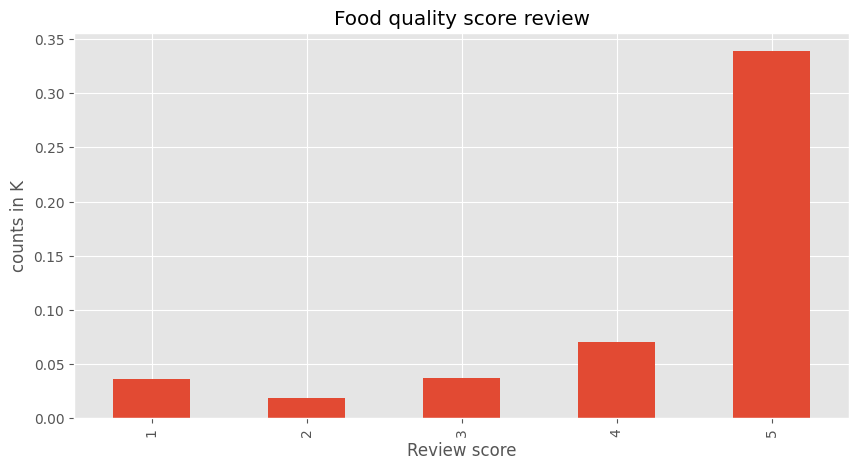

In [34]:
ax = (df['Score'].value_counts()/1000).sort_index().plot(ylabel='counts in K', kind= 'bar', title='Food quality score review', figsize=(10, 5))
ax.set_xlabel('Review score')
plt.show()

In [35]:
example = df['Text'][0]
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [36]:
tokens = nltk.word_tokenize(example)

In [37]:
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meskara/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
sia.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [40]:
sia.polarity_scores('I am unhappy')

{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}

In [41]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [42]:
# Run the polarity on the entire data set

In [43]:
dic = {}

for i, row in tqdm(df.iterrows(), total= len(df)):
    
    text = row['Text']
    
    id = row['Id']
    
    dic[id] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [44]:
dic

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [45]:
res = pd.DataFrame(dic).T
res = res.reset_index().rename(columns={'index': 'Id'})
res = res.merge(df, how='left')

In [46]:
res.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


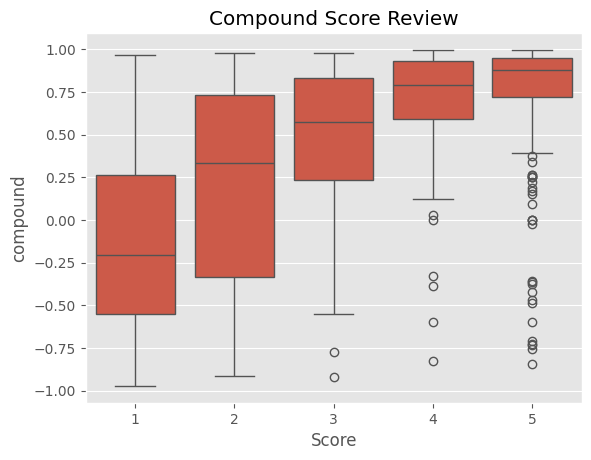

In [47]:
ax = sns.boxplot(data=res, x='Score', y='compound')
ax.set_title('Compound Score Review')
plt.show()

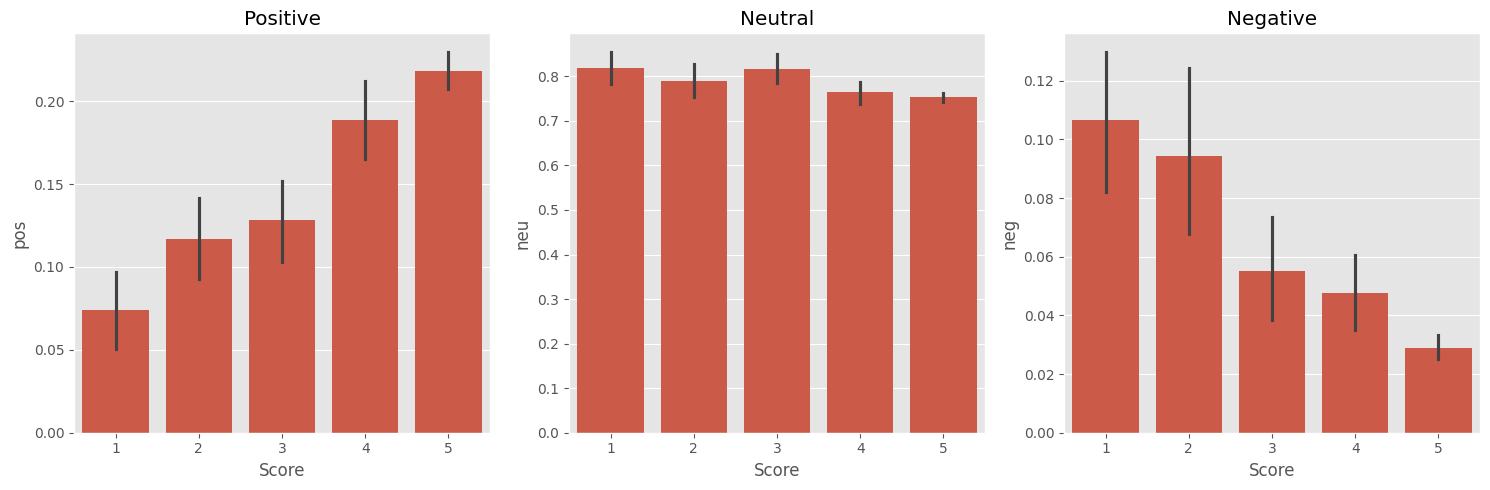

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data= res, x= 'Score', y= 'pos', ax=ax[0])
sns.barplot(data= res, x= 'Score', y= 'neu', ax= ax[1])
sns.barplot(data= res, x= 'Score', y= 'neg', ax= ax[2])

ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [49]:
####################################### Roberta ################################

In [50]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [51]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

In [52]:
print(example)
sia.polarity_scores(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [53]:
enc = tokenizer(example, return_tensors='pt')

In [54]:
output = model(**enc)
output = output[0][0].detach().numpy()
scores = softmax(output)

In [55]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

In [56]:
scores_dict

{'roberta_neg': 0.009624217,
 'roberta_neu': 0.049980365,
 'roberta_pos': 0.94039536}

In [57]:
def polarity_score(text):
    
    enc = tokenizer(text, return_tensors='pt')
    
    output = model(**enc)
    output = output[0][0].detach().numpy()
    scores = softmax(output)
    
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
    
    return scores_dict

In [58]:
dic = {} 
    
for i, row in tqdm(df.iterrows(), total= len(df)):
    
    try :
        
        text = row['Text']
        
        id = row['Id']
        
        ex = sia.polarity_scores(text)
        
        ex_dic = {}
        
        for key, value in ex.items():
            ex_dic[f'ex_{key}'] = value
        
        roberta_results = polarity_score(text)
        
        both = {**ex_dic, **roberta_results}
        
        dic[id] = both
    
    except RuntimeError:
        print('Text too big')

  0%|          | 0/500 [00:00<?, ?it/s]

Text too big
Text too big


In [59]:
res_new = pd.DataFrame(dic).T
res_new = res_new.reset_index().rename(columns={'index': 'Id'})
res_new = res_new.merge(df, how='left')

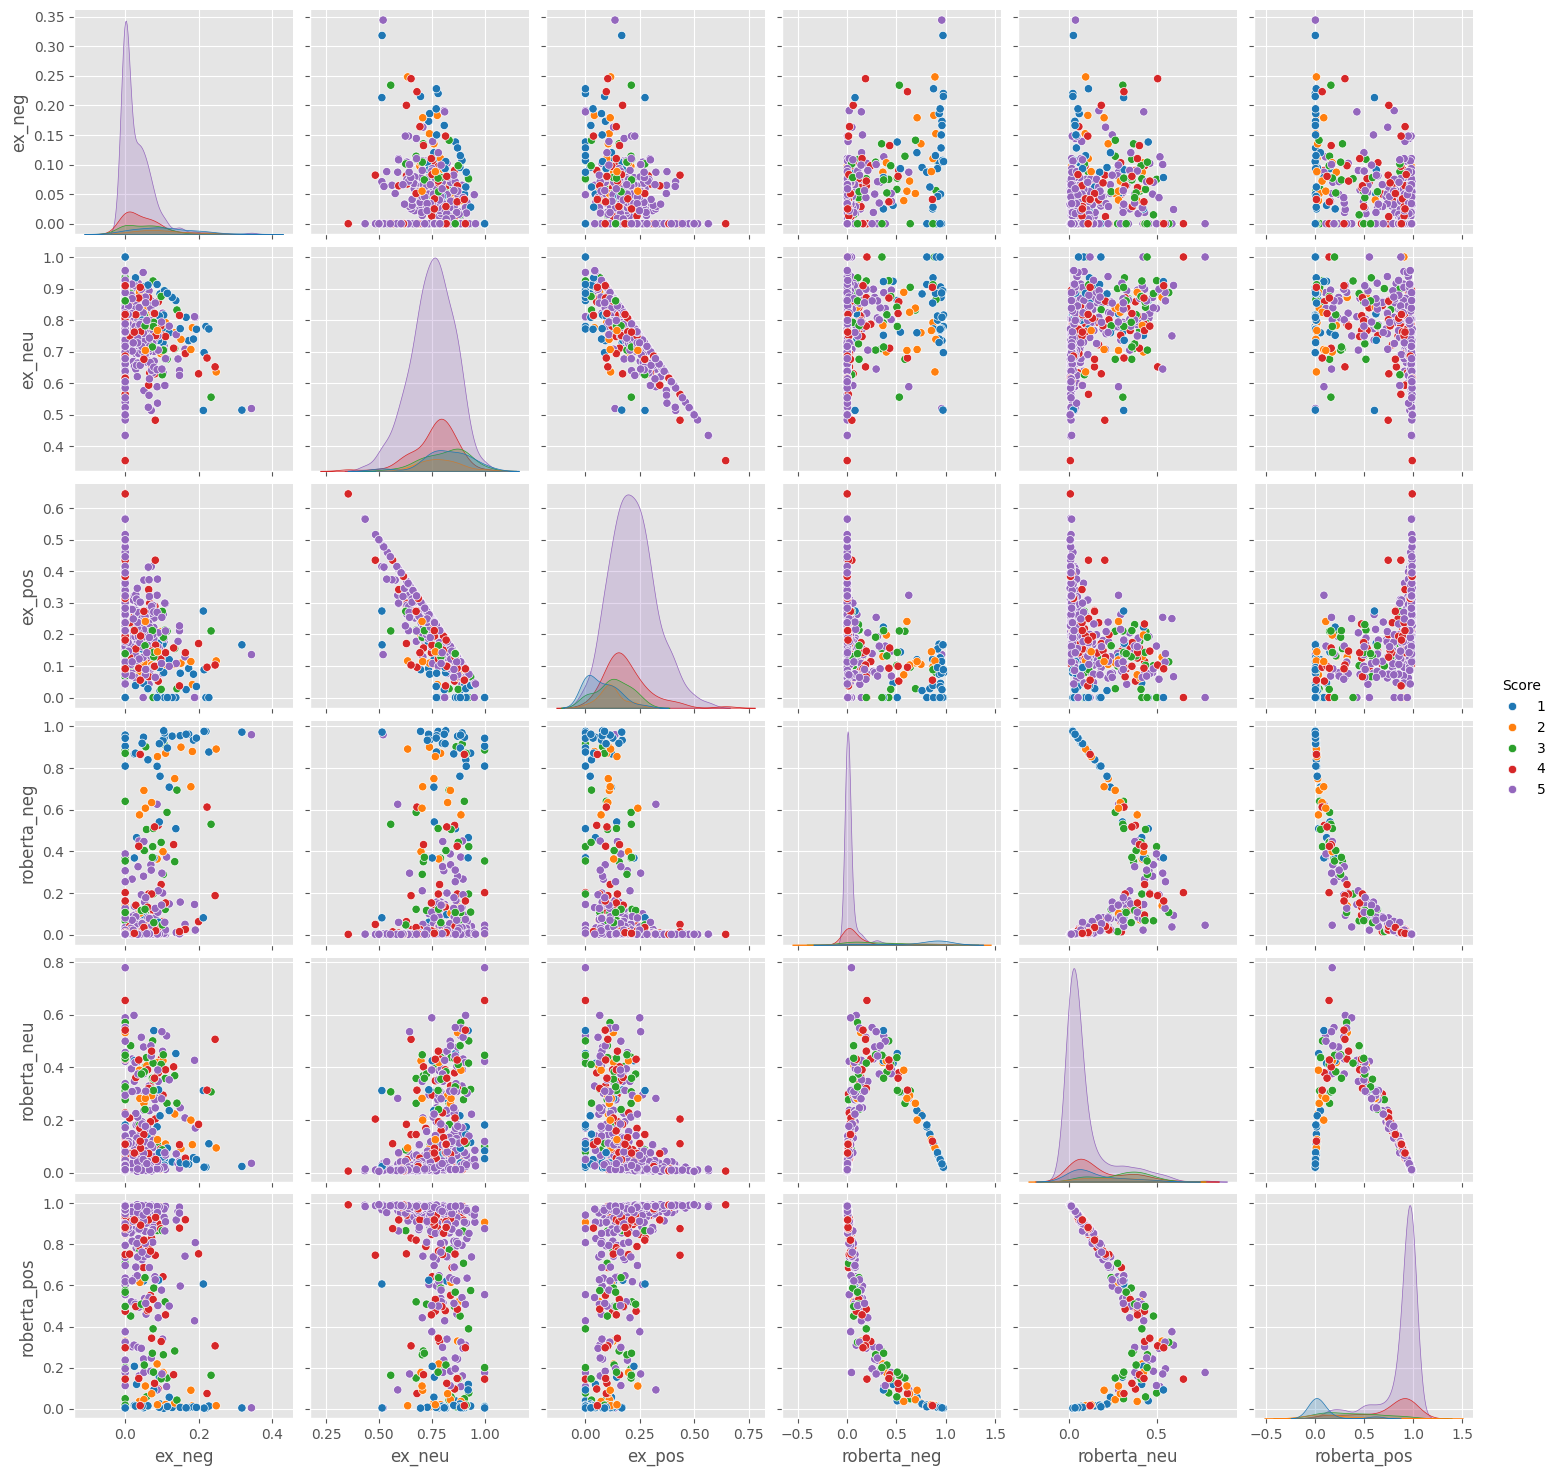

In [65]:
sns.pairplot(data=res_new, vars= ['ex_neg', 'ex_neu', 'ex_pos', 'roberta_neg',
       'roberta_neu', 'roberta_pos'], hue= 'Score', palette= "tab10")
plt.show()